# Качество вина


Признаки:
- `type` (красное / белое)
- `fixed acidity` (фиксированная кислотность)
- `volatile acidity` (летучая кислотность)
- `citric acid` (лимонная кислота)
- `residual sugar` (остаточный сахар)
- `chlorides` (хлориды)
- `free sulfur dioxide` (свободный диоксид серы)
- `total sulfur dioxide` (суммарный диоксид серы)
- `density` (плотность)
- `pH`
- `sulfates` (сульфаты)
- `alcohol` (спирт)

По данным признакам необходимо предсказать качество вина от 0 до 10:

- `quality` (качество)

Признак `type` - категориальный (white/red), все остальные признаки являются числовыми

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import matplotlib.gridspec as gridspec

# Чтение данных

In [2]:
url = "winequalityN.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data_raw.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data_raw.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
data_raw.index

RangeIndex(start=0, stop=6497, step=1)

In [7]:
data_raw['type'] = data_raw['type'].astype('category')

In [8]:
data_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
data_raw.describe(include=['category'])

,type
count,6497
unique,2
top,white
freq,4898


# Устранение выбросов

- Поскольку, в нашей задаче, практически во всех признаках присутствует небольшое количество выбросов, необходимо избавиться от них. Это позволит улучшить решающее правило и снизить вероятность ошибочного предсказания.

Далее показаны некоторые примеры выбросов

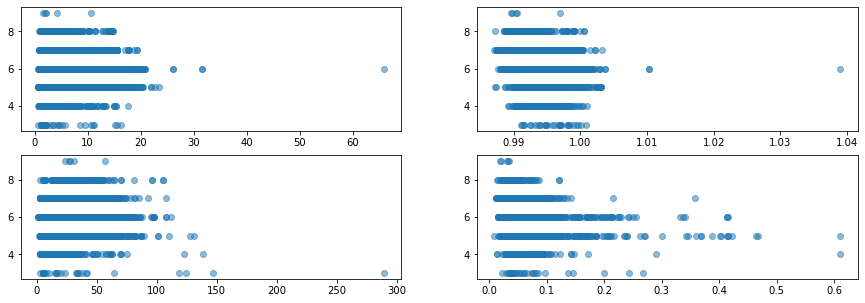

In [10]:
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(nrows=2, ncols=2)


ax = fig.add_subplot(gs[0, 0])
ax.scatter(x='residual sugar', y='quality', data=data_raw, alpha = 0.5)
pass

ax = fig.add_subplot(gs[1, 0])
ax.scatter(x='free sulfur dioxide', y='quality', data=data_raw, alpha = 0.5)
pass

ax = fig.add_subplot(gs[0, 1])
ax.scatter(x='density', y='quality', data=data_raw, alpha = 0.5)
pass

ax = fig.add_subplot(gs[1, 1])
ax.scatter(x='chlorides', y='quality', data=data_raw, alpha = 0.5)
pass

In [11]:
for i in range(1, 12):
    rows_to_drop = data_raw[(data_raw[data_raw.columns[i]] < data_raw[data_raw.columns[i]].quantile(0.005)) | (data_raw[data_raw.columns[i]] > data_raw[data_raw.columns[i]].quantile(0.995))].index
    data_raw = data_raw.drop(rows_to_drop)
data = data_raw
data.shape

(5953, 13)

# Визуализация данных

- Поскольку красное и белое вино несколько различаются по химическому составу, будет логично разбить данные на три выборки:
    - Данные красного и белого вина
    - Данные только красного и только белого вина

In [12]:
data_W = data[data['type'] == 'white']
data_W = data_W.drop(['type'], axis=1)


data_R = data[data['type'] == 'red']
data_R = data_R.drop(['type'], axis=1)

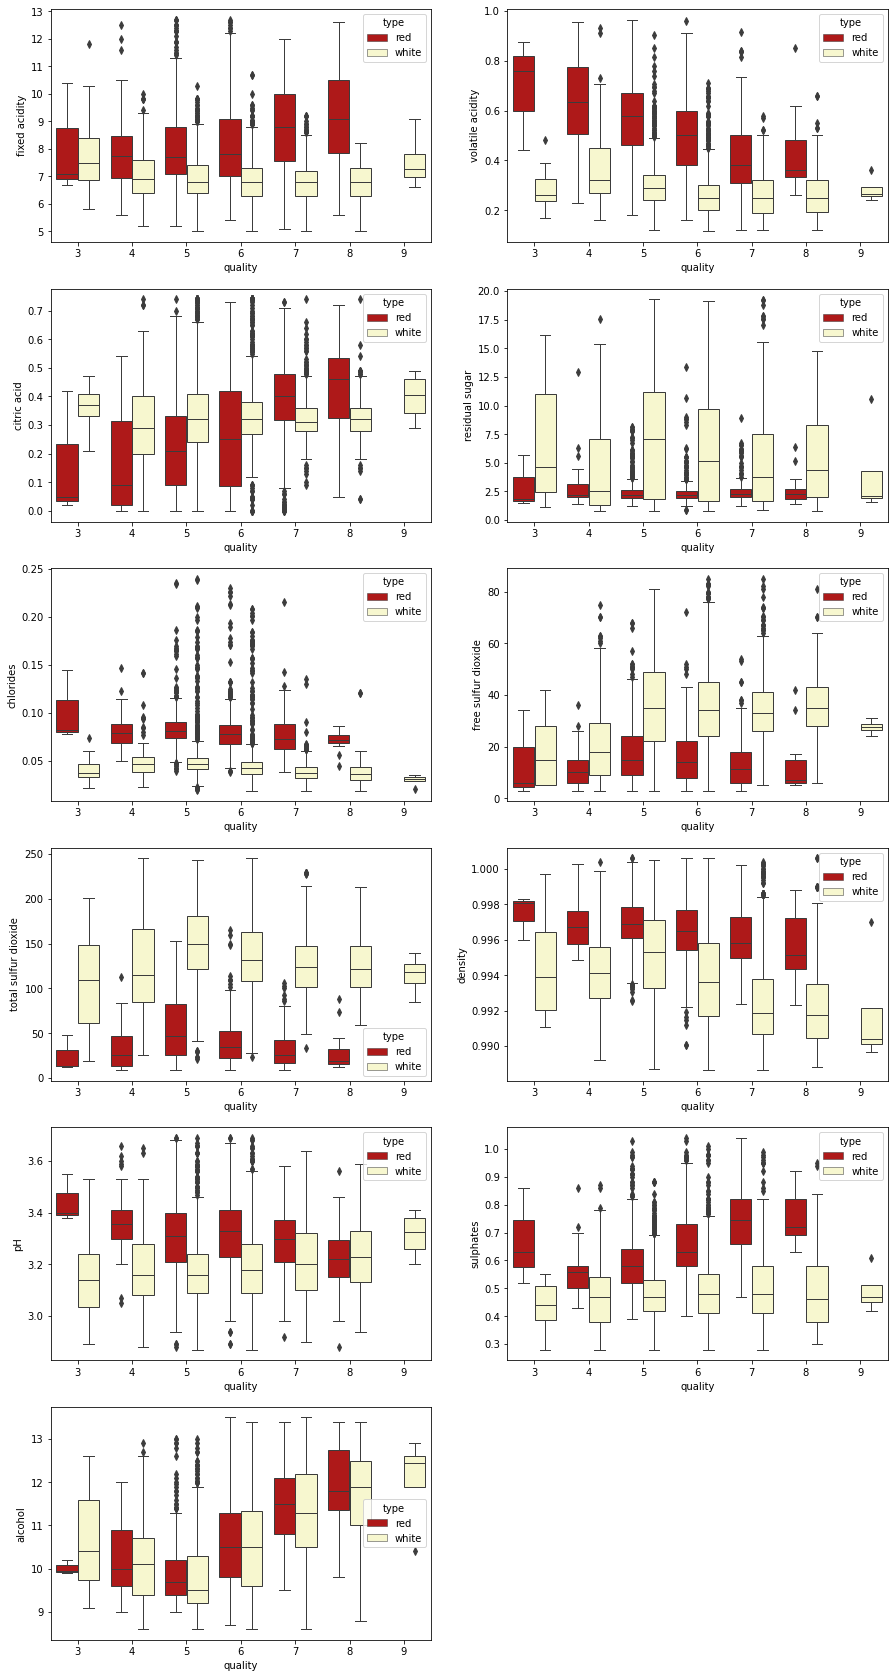

In [13]:
fig = plt.figure(figsize=(15, 30))
gs = gridspec.GridSpec(nrows=6, ncols=2)

k = 1
for i in range(0, 6):
    for j in range(0, 2):
        if k < 12 :
            ax = fig.add_subplot(gs[i, j])
            sns.boxplot(data=data, x="quality", y=data.columns[k], hue="type", linewidth=1,
               palette={"red": (200/256, 0/256, 0/256), "white": (254/256, 255/256, 201/256)}, ax = ax)
            k= k + 1

Text(0.5, 1.0, 'Матрица корреляции для белого и красного вина')

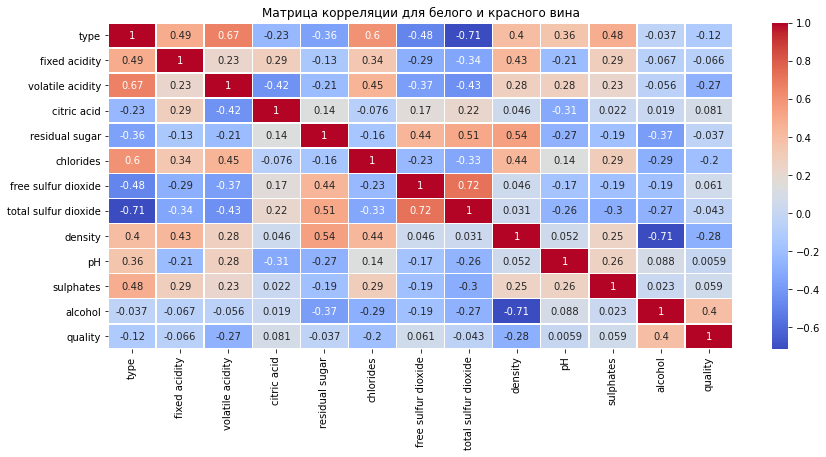

In [47]:
fig = plt.figure(figsize=(14, 6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, linewidths=.5)
plt.title("Матрица корреляции для белого и красного вина")

Text(0.5, 1.0, 'Матрица корреляции для белого вина')

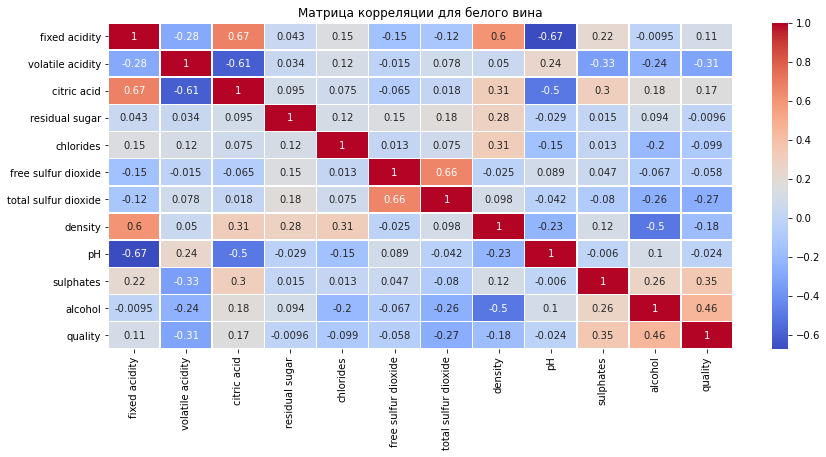

In [48]:
fig = plt.figure(figsize=(14, 6))
sns.heatmap(data_W.corr(), cmap='coolwarm', annot=True, linewidths=.5)
plt.title("Матрица корреляции для белого вина")

Text(0.5, 1.0, 'Матрица корреляции для красного вина')

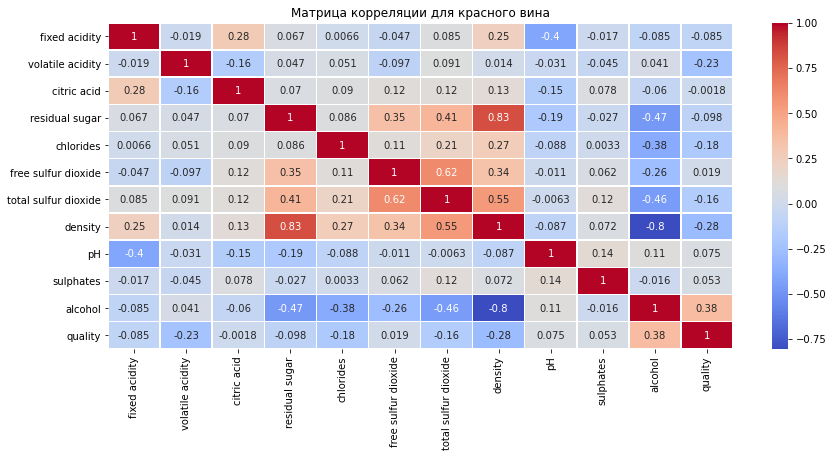

In [49]:
fig = plt.figure(figsize=(14, 6))
sns.heatmap(data_R.corr(), cmap='coolwarm', annot=True, linewidths=.5)
plt.title("Матрица корреляции для красного вина")

# Некоторые выводы на основе полученных графиков

- Красное вино
    - Качество растет с ростом фиксированной кислостности и снижается при росте летучей кислотности
    - Качество растет с ростом лимонной кислоты
    - Так же качество увеличивается с увеличением значения алкоголя
    
- Белое вино
    - Относительно заметное влияние на увеличение качества влияет только увеличение значения алкоголя
    
Так же из матрицы корреляции видно, что ввиду различного хиимического состава красного и белого вина, есть смысл проводить выбор решающего правила, отдельно для каждого вида вина.

\* Далее классификация будет производиться на трех выборках: RW - исходная выборка с красным и белым вином, R - выборка только с красным вином, W - выборка только с белым вином.

# Обработка пропущенных значений

- Проверим наши данные на наличие пропущенных значений

In [15]:
data.isna().sum()  

type                     0
fixed acidity           10
volatile acidity         7
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [16]:
data_R.isna().sum()  

fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [17]:
data_W.isna().sum()  

fixed acidity           8
volatile acidity        6
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

- Поскольку пропущенные значения присутсвуют только в столбцах соответствующих числовым признакам, то будем заполнять их значением медианы текущего столбца

In [18]:
#RW
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

#R
data_R.fillna(data_R.median(axis = 0), axis=0 , inplace=True)

#W
data_W.fillna(data_W.median(axis = 0), axis=0 , inplace=True)

In [19]:
data.isna().sum()  

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Таким образом мы заполнили пропущенные значения

# Бинаризация категориальных признаков

Единтсвенный категориальный признак `type` принимающий значения red и white можно заменить на числовой признак следующим образом:

- `red` -> 0
- `white` -> 1

In [20]:
data['type'] = pd.factorize(data['type'])[0]

In [21]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


# Нормализация числовых признаков

Поскольку метод k ближайших соседей чувствителен к масштабированию данных, то полезно будет провести нормализацию числовых признаков. Например применим стандартизацию и приведем значения к нулевому среднему и единичному среднеквадратичному отклонению

In [22]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03
mean,-2.337089e-14,2.302173e-14,2.027644e-15,4.199019e-14,-1.416481e-15,-1.468911e-14,7.307367e-16,-1.427121e-15,1.017317e-12,-1.688822e-14,-1.910195e-14,-4.687746e-14,-2.709864e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.570597e-01,-1.866561e+00,-1.415439e+00,-2.297145e+00,-1.007304e+00,-1.380425e+00,-1.656615e+00,-1.949518e+00,-2.131576e+00,-2.297355e+00,-1.888154e+00,-1.628811e+00,-3.294007e+00
25%,-5.570597e-01,-6.721330e-01,-6.764591e-01,-4.762233e-01,-7.884654e-01,-6.355097e-01,-8.081291e-01,-6.751096e-01,-8.073095e-01,-7.182363e-01,-7.345025e-01,-8.440256e-01,-9.602702e-01
50%,-5.570597e-01,-1.602350e-01,-2.909041e-01,-3.920198e-02,-5.258593e-01,-2.826551e-01,-8.085567e-02,5.312352e-02,8.026848e-02,-6.027026e-02,-1.192216e-01,-1.464385e-01,2.065982e-01
75%,-5.570597e-01,3.516629e-01,4.159466e-01,5.434931e-01,5.902168e-01,3.446419e-01,6.464177e-01,7.267392e-01,7.974315e-01,6.634924e-01,5.729693e-01,7.255454e-01,2.065982e-01
max,1.794838e+00,4.702795e+00,4.046589e+00,3.092784e+00,3.041207e+00,7.284115e+00,3.313087e+00,2.347058e+00,2.111047e+00,3.097967e+00,3.957014e+00,2.643910e+00,3.707204e+00


In [23]:
data_stand_R = (data_R - data_R.mean(axis = 0))/data_R.std(axis = 0)
data_stand_R.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03
mean,-1.433621e-14,-1.956827e-15,5.386550e-15,-6.842438e-17,1.856994e-14,9.702641e-17,-6.406420e-17,9.459297e-14,1.595965e-15,-4.220757e-15,1.791483e-14,7.326291e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.043162e+00,-2.476281e+00,-1.399663e+00,-1.376969e+00,-1.989173e+00,-1.261271e+00,-1.182348e+00,-4.013890e+00,-3.185337e+00,-2.022397e+00,-1.693261e+00,-3.414660e+00
25%,-7.320123e-01,-7.527093e-01,-9.117440e-01,-4.979532e-01,-5.386440e-01,-7.796481e-01,-7.646060e-01,-6.523188e-01,-7.059160e-01,-7.168408e-01,-8.924513e-01,-8.302957e-01
50%,-2.731098e-01,-1.403567e-02,-4.433183e-02,-2.342484e-01,-1.306826e-01,-2.017009e-01,-2.825966e-01,1.634806e-02,2.332538e-02,-1.864585e-01,-2.918437e-01,4.618863e-01
75%,5.791378e-01,6.630818e-01,8.095270e-01,1.173580e-01,3.226077e-01,5.688955e-01,4.886186e-01,6.834952e-01,6.067185e-01,5.887157e-01,6.090677e-01,4.618863e-01
max,2.939208e+00,2.725212e+00,2.612118e+00,9.610730e+00,6.985976e+00,5.385122e+00,3.830551e+00,2.387076e+00,2.721518e+00,3.281426e+00,3.111599e+00,3.046250e+00


In [24]:
data_stand_W = (data_W - data_W.mean(axis = 0))/data_W.std(axis = 0)
data_stand_W.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03
mean,1.904310e-14,-7.410146e-15,5.513168e-14,-2.896404e-15,-5.717685e-15,-2.193320e-16,6.069203e-16,1.528448e-12,2.279254e-14,-2.339719e-14,-2.521362e-14,5.136828e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.320574e+00,-1.679158e+00,-2.942609e+00,-1.138937e+00,-1.347843e+00,-2.046109e+00,-2.932802e+00,-1.913328e+00,-2.223479e+00,-1.894384e+00,-1.592213e+00,-3.294978e+00
25%,-7.060560e-01,-6.959213e-01,-5.576258e-01,-9.530824e-01,-4.870464e-01,-7.573757e-01,-7.127966e-01,-8.031661e-01,-6.893602e-01,-7.253705e-01,-8.346759e-01,-1.005952e+00
50%,-8.508757e-02,-1.784285e-01,-1.159622e-01,-2.303165e-01,-1.326008e-01,-4.857218e-02,-9.612854e-02,-8.084925e-02,-6.176628e-02,-9.590187e-02,-7.713894e-02,1.385609e-01
75%,5.358808e-01,4.425628e-01,5.023668e-01,7.196046e-01,2.218448e-01,6.602314e-01,7.178733e-01,7.179692e-01,6.355603e-01,5.335667e-01,7.294976e-01,1.385609e-01
max,6.124596e+00,6.755975e+00,3.594012e+00,2.681398e+00,9.842511e+00,3.237699e+00,2.641878e+00,2.338734e+00,3.494599e+00,4.670075e+00,2.532155e+00,3.572100e+00


## Отбор признаков 

- Обучающую и тестовую выборку разделим в соотношении 9:1

In [25]:
#redwhite
X_RW = data_stand.drop(['quality'], axis=1)
y_RW = data['quality']

#red
X_R = data_stand_R.drop(['quality'], axis=1)
y_R = data_R['quality']

#white
X_W= data_stand_W.drop(['quality'], axis=1)
y_W = data_W['quality']

In [26]:
from sklearn.model_selection import train_test_split
X_train_RW, X_test_RW, y_train_RW, y_test_RW = train_test_split(X_RW, y_RW, test_size = 0.1, random_state = 42)
N_train_RW, _ = X_train_RW.shape 
N_test_RW,  _ = X_test_RW.shape 
print('Количество элементов (RW) в обучающей и тестовой выборке: ', N_train_RW, N_test_RW)

X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size = 0.1, random_state = 42)
N_train_R, _ = X_train_R.shape 
N_test_R,  _ = X_test_R.shape 
print('Количество элементов (R) в обучающей и тестовой выборке: ', N_train_R, N_test_R)

X_train_W, X_test_W, y_train_W, y_test_W = train_test_split(X_W, y_W, test_size = 0.1, random_state = 42)
N_train_W, _ = X_train_W.shape 
N_test_W,  _ = X_test_W.shape 
print('Количество элементов (W) в обучающей и тестовой выборке: ', N_train_W, N_test_W)

Количество элементов (RW) в обучающей и тестовой выборке:  5357 596
Количество элементов (R) в обучающей и тестовой выборке:  1269 141
Количество элементов (W) в обучающей и тестовой выборке:  4088 455


# kNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

err_test

0.4412751677852349

In [28]:
from sklearn.model_selection import GridSearchCV

- Подберем оптимальное количество соседей

In [29]:
#RW
X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 3)
grid.fit(X_train, y_train)
print('Красное и белое вино: ')
best_cv_err = 1 - grid.best_score_; best_n_neighbors = grid.best_estimator_.n_neighbors
print('Ошибка на кросс-валидации и оптимальное кол-во соседей: ', best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train)); err_test  = np.mean(y_test  != knn.predict(X_test))
print('Ошибка на обучающей и на тестовой выборке: ', err_train, err_test)

#R
X_train = X_train_R; y_train = y_train_R; X_test = X_test_R; y_test = y_test_R
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 3)
grid.fit(X_train, y_train)
print('Красное вино: ')
best_cv_err = 1 - grid.best_score_; best_n_neighbors = grid.best_estimator_.n_neighbors
print('Ошибка на кросс-валидации и оптимальное кол-во соседей: ', best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train)); err_test  = np.mean(y_test  != knn.predict(X_test))
print('Ошибка на обучающей и на тестовой выборке: ', err_train, err_test)

#W
X_train = X_train_W; y_train = y_train_W; X_test = X_test_W; y_test = y_test_W
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 3)
grid.fit(X_train, y_train)
print('Белое вино: ')
best_cv_err = 1 - grid.best_score_; best_n_neighbors = grid.best_estimator_.n_neighbors
print('Ошибка на кросс-валидации и оптимальное кол-во соседей: ', best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train)); err_test  = np.mean(y_test  != knn.predict(X_test))
print('Ошибка на обучающей и на тестовой выборке: ', err_train, err_test)

Красное и белое вино: 
Ошибка на кросс-валидации и оптимальное кол-во соседей:  0.3955553255270007 1
Ошибка на обучающей и на тестовой выборке:  0.0 0.34731543624161076
Красное вино: 
Ошибка на кросс-валидации и оптимальное кол-во соседей:  0.39243498817966904 1
Ошибка на обучающей и на тестовой выборке:  0.0 0.3404255319148936
Белое вино: 
Ошибка на кросс-валидации и оптимальное кол-во соседей:  0.4053335674775166 1
Ошибка на обучающей и на тестовой выборке:  0.0 0.3362637362637363


- По полученным результатам видно, что точность предсказания довольно низкая. Это происходит из-за сильной несбалансированности классов, а так же малого размера выборки:

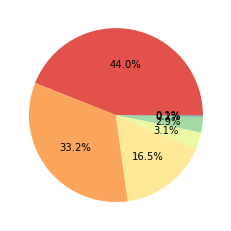

In [30]:
plt.pie(data.quality.value_counts(), colors = sns.color_palette("Spectral"), autopct = '%1.1f%%')
pass

In [31]:
data.quality.value_counts()

6    2619
5    1976
7     980
4     187
8     173
3      14
9       4
Name: quality, dtype: int64

- 14 элеметов принадлежат классу качества 3, и 4 элемента принадлежат классу качества 9. Из-за этого, элементы из таких классов очень сложно предсказать.
- Для решения этой проблемы, можем объединить классы следующим образом: (3, 4, 5) -> 0, (6, 7, 8, 9) -> 1. Таким образом, мы получим всего два класса и сможем сделать хотя бы примерное предположение о качестве.

In [32]:
data.at[data['quality'] == 3, 'quality'] = 0
data.at[data['quality'] == 4, 'quality'] = 0
data.at[data['quality'] == 5, 'quality'] = 0

data.at[data['quality'] == 6, 'quality'] = 1
data.at[data['quality'] == 7, 'quality'] = 1
data.at[data['quality'] == 8, 'quality'] = 1
data.at[data['quality'] == 9, 'quality'] = 1    

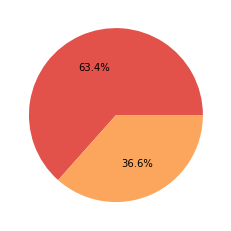

In [33]:
plt.pie(data.quality.value_counts(), colors = sns.color_palette("Spectral"), autopct = '%1.1f%%')
pass

- Полученные данные получились более сбалансированными

In [36]:
data_R = data[data['type'] == 0]
data_R = data_R.drop(['type'], axis=1)

data_W = data[data['type'] == 1]
data_W = data_W.drop(['type'], axis=1)

In [37]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03,5.953000e+03
mean,-2.337089e-14,2.302173e-14,2.027644e-15,4.199019e-14,-1.416481e-15,-1.468911e-14,7.307367e-16,-1.427121e-15,1.017317e-12,-1.688822e-14,-1.910195e-14,-4.687746e-14,1.667778e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.570597e-01,-1.866561e+00,-1.415439e+00,-2.297145e+00,-1.007304e+00,-1.380425e+00,-1.656615e+00,-1.949518e+00,-2.131576e+00,-2.297355e+00,-1.888154e+00,-1.628811e+00,-1.316892e+00
25%,-5.570597e-01,-6.721330e-01,-6.764591e-01,-4.762233e-01,-7.884654e-01,-6.355097e-01,-8.081291e-01,-6.751096e-01,-8.073095e-01,-7.182363e-01,-7.345025e-01,-8.440256e-01,-1.316892e+00
50%,-5.570597e-01,-1.602350e-01,-2.909041e-01,-3.920198e-02,-5.258593e-01,-2.826551e-01,-8.085567e-02,5.312352e-02,8.026848e-02,-6.027026e-02,-1.192216e-01,-1.464385e-01,7.592359e-01
75%,-5.570597e-01,3.516629e-01,4.159466e-01,5.434931e-01,5.902168e-01,3.446419e-01,6.464177e-01,7.267392e-01,7.974315e-01,6.634924e-01,5.729693e-01,7.255454e-01,7.592359e-01
max,1.794838e+00,4.702795e+00,4.046589e+00,3.092784e+00,3.041207e+00,7.284115e+00,3.313087e+00,2.347058e+00,2.111047e+00,3.097967e+00,3.957014e+00,2.643910e+00,7.592359e-01


In [38]:
data_stand_R = (data_R - data_R.mean(axis = 0))/data_R.std(axis = 0)
data_stand_R.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03,4.543000e+03
mean,1.158053e-14,-7.650177e-15,5.442122e-14,-2.646500e-15,-5.464360e-15,-2.193320e-16,6.069203e-16,1.528448e-12,2.403711e-14,-2.380750e-14,-2.521362e-14,-2.005342e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.320972e+00,-1.679584e+00,-2.942552e+00,-1.138632e+00,-1.347936e+00,-2.046109e+00,-2.932802e+00,-1.913328e+00,-2.223771e+00,-1.894494e+00,-1.592213e+00,-1.410796e+00
25%,-7.064813e-01,-6.963381e-01,-5.575834e-01,-9.527953e-01,-4.871370e-01,-7.573757e-01,-7.127966e-01,-8.031661e-01,-6.896731e-01,-7.254859e-01,-8.346759e-01,-1.410796e+00
50%,-8.552351e-02,-1.788403e-01,-1.159226e-01,-2.300954e-01,-1.326904e-01,-4.857218e-02,-9.612854e-02,-8.084925e-02,-6.208777e-02,-9.602019e-02,-7.713894e-02,7.086637e-01
75%,5.354343e-01,4.421570e-01,5.024026e-01,7.197387e-01,2.217562e-01,6.602314e-01,7.178733e-01,7.179692e-01,6.352293e-01,5.334455e-01,7.294976e-01,7.086637e-01
max,6.124055e+00,6.755630e+00,3.594028e+00,2.681353e+00,9.842450e+00,3.237699e+00,2.641878e+00,2.338734e+00,3.494229e+00,4.669934e+00,2.532155e+00,7.086637e-01


In [39]:
data_stand_W = (data_W - data_W.mean(axis = 0))/data_W.std(axis = 0)
data_stand_W.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03
mean,-1.601430e-14,-2.084542e-15,5.580406e-15,-6.842438e-17,1.856994e-14,9.702641e-17,-6.406420e-17,9.459297e-14,-7.832978e-16,-3.543226e-15,1.791483e-14,-1.628170e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.041606e+00,-2.473485e+00,-1.399856e+00,-1.376969e+00,-1.989173e+00,-1.261271e+00,-1.182348e+00,-4.013890e+00,-3.182832e+00,-2.019674e+00,-1.693261e+00,-1.068666e+00
25%,-7.309774e-01,-7.511609e-01,-9.119498e-01,-4.979532e-01,-5.386440e-01,-7.796481e-01,-7.646060e-01,-6.523188e-01,-7.044757e-01,-7.150916e-01,-8.924513e-01,-1.068666e+00
50%,-2.722575e-01,-1.302213e-02,-4.456131e-02,-2.342484e-01,-1.306826e-01,-2.017009e-01,-2.825966e-01,1.634806e-02,2.445270e-02,-2.258732e-01,-2.918437e-01,9.350826e-01
75%,5.796509e-01,6.636050e-01,8.092742e-01,1.173580e-01,3.226077e-01,5.688955e-01,4.886186e-01,6.834952e-01,6.075954e-01,5.894908e-01,6.090677e-01,9.350826e-01
max,2.938782e+00,2.724242e+00,2.611816e+00,9.610730e+00,6.985976e+00,5.385122e+00,3.830551e+00,2.387076e+00,2.721488e+00,3.280192e+00,3.111599e+00,9.350826e-01


In [40]:
#redwhite
X_RW = data_stand.drop(['quality'], axis=1)
y_RW = data['quality']

#red
X_R = data_stand_R.drop(['quality'], axis=1)
y_R = data_R['quality']

#white
X_W= data_stand_W.drop(['quality'], axis=1)
y_W = data_W['quality']

In [41]:
from sklearn.model_selection import train_test_split
X_train_RW, X_test_RW, y_train_RW, y_test_RW = train_test_split(X_RW, y_RW, test_size = 0.1, random_state = 42)
N_train_RW, _ = X_train_RW.shape 
N_test_RW,  _ = X_test_RW.shape 
print('Количество элементов (RW) в обучающей и тестовой выборке: ', N_train_RW, N_test_RW)

X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size = 0.1, random_state = 42)
N_train_R, _ = X_train_R.shape 
N_test_R,  _ = X_test_R.shape 
print('Количество элементов (R) в обучающей и тестовой выборке: ', N_train_R, N_test_R)

X_train_W, X_test_W, y_train_W, y_test_W = train_test_split(X_W, y_W, test_size = 0.1, random_state = 42)
N_train_W, _ = X_train_W.shape 
N_test_W,  _ = X_test_W.shape 
print('Количество элементов (W) в обучающей и тестовой выборке: ', N_train_W, N_test_W)

Количество элементов (RW) в обучающей и тестовой выборке:  5357 596
Количество элементов (R) в обучающей и тестовой выборке:  4088 455
Количество элементов (W) в обучающей и тестовой выборке:  1269 141


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#RW
X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 10)
grid.fit(X_train, y_train)
print('Красное и белое вино: ')
best_cv_err = 1 - grid.best_score_; best_n_neighbors = grid.best_estimator_.n_neighbors
print('Ошибка на кросс-валидации и оптимальное кол-во соседей: ', best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train)); err_test  = np.mean(y_test  != knn.predict(X_test))
print('Ошибка на обучающей и на тестовой выборке: ', err_train, err_test)

#R
X_train = X_train_R; y_train = y_train_R; X_test = X_test_R; y_test = y_test_R
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 10)
grid.fit(X_train, y_train)
print('Красное вино: ')
best_cv_err = 1 - grid.best_score_; best_n_neighbors = grid.best_estimator_.n_neighbors
print('Ошибка на кросс-валидации и оптимальное кол-во соседей: ', best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train)); err_test  = np.mean(y_test  != knn.predict(X_test))
print('Ошибка на обучающей и на тестовой выборке: ', err_train, err_test)

#W
X_train = X_train_W; y_train = y_train_W; X_test = X_test_W; y_test = y_test_W
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 10)
grid.fit(X_train, y_train)
print('Белое вино: ')
best_cv_err = 1 - grid.best_score_; best_n_neighbors = grid.best_estimator_.n_neighbors
print('Ошибка на кросс-валидации и оптимальное кол-во соседей: ', best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train)); err_test  = np.mean(y_test  != knn.predict(X_test))
print('Ошибка на обучающей и на тестовой выборке: ', err_train, err_test)

Красное и белое вино: 
Ошибка на кросс-валидации и оптимальное кол-во соседей:  0.21448319151904038 1
Ошибка на обучающей и на тестовой выборке:  0.0 0.2231543624161074
Красное вино: 
Ошибка на кросс-валидации и оптимальное кол-во соседей:  0.1976496955750514 1
Ошибка на обучающей и на тестовой выборке:  0.0 0.189010989010989
Белое вино: 
Ошибка на кросс-валидации и оптимальное кол-во соседей:  0.24033245844269469 1
Ошибка на обучающей и на тестовой выборке:  0.0 0.2127659574468085


# Выводы

- Таким образом, благодаря объединению шести классов качества в два, удалось несколько улучшить ошибку предсказания с ~0.4 до ~0.2.

- Так же видно, что вероятность правильного предсказания отдельно для красного вина (\~0.19) выше, чем отдельно для белого вина (~0.24). Это обусловленно тем, что зависимость качества красного вина от его химического состава более выраженная, в отличии от белого вина, у которого качество в основном зависит от значения алкоголя.

- Для выборки, в которой одновременно участвовали оба типа вина, результат получился средним (~0.21).


# Другие классификаторы

# SVC

In [49]:
from sklearn.svm import SVC

In [50]:
#RW
X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.20104536120963226
Ошибка на тестовой выборке:  0.24496644295302014


# Random forest

In [53]:
from sklearn import ensemble

In [54]:
#RW
X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.16778523489932887


# Extremely Randomized Trees

In [55]:
#RW
X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.17114093959731544


# AdaBoost

In [57]:
#RW
X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.21784580922157923
Ошибка на тестовой выборке:  0.2550335570469799


# GBT

In [58]:
#RW
X_train = X_train_RW; y_train = y_train_RW; X_test = X_test_RW; y_test = y_test_RW
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.18443158484226246
Ошибка на тестовой выборке:  0.25


- Наилучший результат (~0.16) был достигнут при использовании классификатора - случайный лес.